In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Stock comb.csv')
df.drop(['IGL','PNB','TATAPOWER', 'VOLTAS'], axis =1, inplace = True)
df.head()

,DHFL,mov_avg_14,mov_std_14,Upper,Lower,Daily_Average_DHFL
0,431.40,NaN,NaN,NaN,NaN,430.950000
1,424.45,NaN,NaN,NaN,NaN,426.633333
2,429.00,NaN,NaN,NaN,NaN,427.200000
3,417.95,NaN,NaN,NaN,NaN,420.800000
4,404.20,NaN,NaN,NaN,NaN,409.766667


In [3]:
# adding a Call column on the basis of closing price of DHFL 
conditions = [(df['DHFL'] < df['Lower']),
              (df['DHFL'] < df['mov_avg_14']) & (df['DHFL'] > df['Lower']),
              (df['DHFL'] > df['mov_avg_14']) & (df['DHFL'] < df['Upper']),
              (df['DHFL'] > df['Upper'])
             ]

choices = ['Buy','Hold Buy/Liquidate Short','Hold Short/Liquidate Buy', 'Short']
df['Call'] = np.select(conditions, choices)

In [4]:
# overview count of different calls
# data for buy and short is not desirable (very low)
df['Call'].value_counts()

Hold Short/Liquidate Buy    223
Hold Buy/Liquidate Short    212
Buy                          25
Short                        21
0                            13
Name: Call, dtype: int64

In [5]:
df = df.dropna()
df.drop(['mov_std_14','Daily_Average_DHFL'], axis = 1, inplace = True)
df.head()

,DHFL,mov_avg_14,Upper,Lower,Call
13,416.90,412.953571,433.924667,391.982475,Hold Short/Liquidate Buy
14,414.25,411.728571,429.870818,393.586325,Hold Short/Liquidate Buy
15,430.75,412.178571,431.921953,392.435190,Hold Short/Liquidate Buy
16,424.60,411.864286,430.566833,393.161738,Hold Short/Liquidate Buy
17,431.45,412.828571,434.098620,391.558523,Hold Short/Liquidate Buy


In [6]:
# selecting all the rows and all the columns for x
# selecting all the rows but only last columns for y
X = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values 

In [7]:
# we can use the commands below to change the categorical values to numerical values

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y = le.fit_transform(y)

## Logistic Regression

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [9]:
logr = LogisticRegression()
logr.fit(X_train,y_train)

C:\Users\risha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\risha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# accuracy is very good
predictions_logistic_regression = logr.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions_logistic_regression))

                          precision    recall  f1-score   support

                     Buy       1.00      0.86      0.92         7
Hold Buy/Liquidate Short       0.93      1.00      0.97        56
Hold Short/Liquidate Buy       0.97      0.96      0.97        76
                   Short       1.00      0.67      0.80         6

                accuracy                           0.96       145
               macro avg       0.98      0.87      0.91       145
            weighted avg       0.96      0.96      0.96       145



In [11]:
print(confusion_matrix(y_test,predictions_logistic_regression))

[[ 6  1  0  0]
 [ 0 56  0  0]
 [ 0  3 73  0]
 [ 0  0  2  4]]


## K nearest neighbour

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
# using scaler to scale the whole data frame to single scale
# as values are used to measure distance so scaling is very important
scaler = StandardScaler()
scaler.fit(df.drop('Call', axis = 1))
scaled_features = scaler.transform(df.drop('Call', axis = 1))
scaled_features

array([[-0.14541981, -0.19324256, -0.28448204, -0.0900694 ],
       [-0.1595954 , -0.20000738, -0.30607627, -0.08135713],
       [-0.07133227, -0.19752234, -0.2951502 , -0.08761021],
       ...,
       [-1.75501842, -1.71118374, -1.6971329 , -1.63580252],
       [-1.75287871, -1.7327207 , -1.74175492, -1.63266918],
       [-1.78203229, -1.75092456, -1.76370287, -1.64610061]])

In [14]:
df_knn = pd.DataFrame(scaled_features, columns = df.columns[:-1])
df_knn.head()

,DHFL,mov_avg_14,Upper,Lower
0,-0.145420,-0.193243,-0.284482,-0.090069
1,-0.159595,-0.200007,-0.306076,-0.081357
2,-0.071332,-0.197522,-0.295150,-0.087610
3,-0.104230,-0.199258,-0.302369,-0.083664
4,-0.067588,-0.193933,-0.283555,-0.092372


In [15]:
X = df_knn
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
predictions_Knn = knn.predict(X_test)

In [17]:
# accuracy is average
print(classification_report(y_test,predictions_Knn))

                          precision    recall  f1-score   support

                     Buy       0.50      0.14      0.22         7
Hold Buy/Liquidate Short       0.84      0.91      0.87        56
Hold Short/Liquidate Buy       0.89      0.93      0.91        76
                   Short       0.50      0.17      0.25         6

                accuracy                           0.86       145
               macro avg       0.68      0.54      0.56       145
            weighted avg       0.83      0.86      0.83       145



## Decision Trees and Random Forest

In [18]:
X = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions_tree = dtree.predict(X_test)

In [20]:
# here the accuracy is below average
print(classification_report(y_test, predictions_tree))

                          precision    recall  f1-score   support

                     Buy       0.33      0.14      0.20         7
Hold Buy/Liquidate Short       0.78      0.82      0.80        56
Hold Short/Liquidate Buy       0.84      0.91      0.87        76
                   Short       1.00      0.17      0.29         6

                accuracy                           0.81       145
               macro avg       0.74      0.51      0.54       145
            weighted avg       0.80      0.81      0.79       145



In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)

In [22]:
# generally random forest have high accuracy in comparison to decision trees
# but here it is abysmal
# it can be because of low data for buy and short call
# we can clearly see the accuracy for Hold Buy/Liquidate Short and Hold Short/Liquidate Buy increased significantly
rfc.fit(X_train,y_train)
predictions_rfc = rfc.predict(X_test)
print(classification_report(y_test, predictions_rfc))

                          precision    recall  f1-score   support

                     Buy       0.00      0.00      0.00         7
Hold Buy/Liquidate Short       0.79      0.93      0.85        56
Hold Short/Liquidate Buy       0.87      0.91      0.89        76
                   Short       0.00      0.00      0.00         6

                accuracy                           0.83       145
               macro avg       0.42      0.46      0.44       145
            weighted avg       0.76      0.83      0.80       145



C:\Users\risha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Support Vector Machine (using grid search)

In [23]:
X = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [24]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train, y_train)
predictions_svm = sv.predict(X_test)

C:\Users\risha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [25]:
# the buy and short call have 0 accuracy either beacuse of low data or bad parameters
print(classification_report(y_test,predictions_svm))

                          precision    recall  f1-score   support

                     Buy       0.00      0.00      0.00         7
Hold Buy/Liquidate Short       0.43      1.00      0.61        56
Hold Short/Liquidate Buy       0.94      0.20      0.33        76
                   Short       0.00      0.00      0.00         6

                accuracy                           0.49       145
               macro avg       0.34      0.30      0.23       145
            weighted avg       0.66      0.49      0.40       145



C:\Users\risha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
# using for hit and try 
# different values of C, gamma, kernel to find the best parameters
param_grid = {'C': [0.1,1, 10, 100, 1000], 
              'gamma': [1,0.1,0.01,0.001,0.0001], 
              'kernel': ['rbf']} 

In [28]:
# instantiating GridSearchCV as grid
# passing arguments:
# estimator --> SVC (instantiated by sv)
# param_grid --> the different values we want to try
# verbose --> text output of the description of process higher the number more the verbose
grid = GridSearchCV(sv, param_grid, verbose = 3)

In [29]:
# we are getting text description due to verbose 
# '.fit' first runs the loop with cross validation (bias vs variance) to find the best parameter combination
# once it has the best parameter combination it runs fit again without cross validation
grid.fit(X_train, y_train)

C:\Users\risha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.464, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.464, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.464, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.464, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.464, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.464, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.571, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.643, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.741, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.812, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.759, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.893, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.875, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [30]:
# gives the best parameter combination
print('Grid Parameters: ', grid.best_params_)

# gives the best estimator description
print('Grid Estimator: ' , grid.best_estimator_)

Grid Parameters:  {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
Grid Estimator:  SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [31]:
# we can see our precision has increased significantly
predictions_grid_svm = grid.predict(X_test)
print(classification_report(y_test,predictions_grid_svm))

                          precision    recall  f1-score   support

                     Buy       1.00      0.43      0.60         7
Hold Buy/Liquidate Short       0.89      1.00      0.94        56
Hold Short/Liquidate Buy       0.96      0.96      0.96        76
                   Short       1.00      0.50      0.67         6

                accuracy                           0.93       145
               macro avg       0.96      0.72      0.79       145
            weighted avg       0.94      0.93      0.92       145



In [32]:
# loading a new stok for testing our best model
df1 = pd.read_csv('PNB.csv')
df1 = df1[df1['Series'] == 'EQ']
df1.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,PNB,EQ,15-May-2017,169.15,169.95,171.30,166.2,166.85,166.80,168.94,7476618,1.263123e+09,41641,1352589,18.09
1,PNB,EQ,16-May-2017,166.80,167.35,178.00,164.8,173.20,174.15,173.13,51532461,8.921904e+09,254027,5804867,11.26
2,PNB,EQ,17-May-2017,174.15,173.00,173.10,164.3,164.80,165.05,167.27,26536944,4.438942e+09,116512,7037498,26.52
3,PNB,EQ,18-May-2017,165.05,163.40,164.40,157.9,158.25,158.50,161.06,13905573,2.239613e+09,76746,3245443,23.34
4,PNB,EQ,19-May-2017,158.50,159.50,162.25,154.1,155.20,155.20,157.59,16311602,2.570540e+09,82394,2816963,17.27


In [33]:
df1['mov_avg_14'] = df1['Close Price'].rolling(14).mean()
df1['mov_std_14'] = df1['Close Price'].rolling(14).std() 

df1['Upper'] = (df1['mov_avg_14']) + (df1['mov_std_14'] * 2)
df1['Lower'] = (df1['mov_avg_14']) - (df1['mov_std_14'] * 2)
df1.rename(columns = {'Close Price' : 'PNB'}, inplace = True)

In [34]:
df1.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,PNB,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,mov_avg_14,mov_std_14,Upper,Lower
0,PNB,EQ,15-May-2017,169.15,169.95,171.30,166.2,166.85,166.80,168.94,7476618,1.263123e+09,41641,1352589,18.09,NaN,NaN,NaN,NaN
1,PNB,EQ,16-May-2017,166.80,167.35,178.00,164.8,173.20,174.15,173.13,51532461,8.921904e+09,254027,5804867,11.26,NaN,NaN,NaN,NaN
2,PNB,EQ,17-May-2017,174.15,173.00,173.10,164.3,164.80,165.05,167.27,26536944,4.438942e+09,116512,7037498,26.52,NaN,NaN,NaN,NaN
3,PNB,EQ,18-May-2017,165.05,163.40,164.40,157.9,158.25,158.50,161.06,13905573,2.239613e+09,76746,3245443,23.34,NaN,NaN,NaN,NaN
4,PNB,EQ,19-May-2017,158.50,159.50,162.25,154.1,155.20,155.20,157.59,16311602,2.570540e+09,82394,2816963,17.27,NaN,NaN,NaN,NaN


In [35]:
df_new_stock = df1[['PNB','mov_avg_14','mov_std_14','Upper','Lower']]
df_new_stock = df_new_stock.dropna()
df_new_stock.head()

,PNB,mov_avg_14,mov_std_14,Upper,Lower
13,151.90,154.503571,8.579391,171.662353,137.344790
14,153.05,153.521429,7.816568,169.154565,137.888292
15,153.80,152.067857,5.108387,162.284631,141.851083
16,149.50,150.957143,3.508553,157.974249,143.940037
17,152.35,150.517857,2.806216,156.130289,144.905425


In [36]:
# adding call column to later check the acuracy of our model
conditions = [(df_new_stock['PNB'] < df_new_stock['Lower']),
              (df_new_stock['PNB'] < df_new_stock['mov_avg_14']) & (df_new_stock['PNB'] > df_new_stock['Lower']),
              (df_new_stock['PNB'] > df_new_stock['mov_avg_14']) & (df_new_stock['PNB'] < df_new_stock['Upper']),
              (df_new_stock['PNB'] > df_new_stock['Upper'])
             ]

choices = ['Buy','Hold Buy/Liquidate Short','Hold Short/Liquidate Buy', 'Short']
df_new_stock['Call'] = np.select(conditions, choices)

In [37]:
df_new_stock.drop(['mov_std_14'], axis = 1, inplace = True)
df_new_stock.head()

,PNB,mov_avg_14,Upper,Lower,Call
13,151.90,154.503571,171.662353,137.344790,Hold Buy/Liquidate Short
14,153.05,153.521429,169.154565,137.888292,Hold Buy/Liquidate Short
15,153.80,152.067857,162.284631,141.851083,Hold Short/Liquidate Buy
16,149.50,150.957143,157.974249,143.940037,Hold Buy/Liquidate Short
17,152.35,150.517857,156.130289,144.905425,Hold Short/Liquidate Buy


In [38]:
X = df_new_stock.iloc[:, :-1].values 
y = df_new_stock.iloc[:, -1].values 

In [39]:
# using logistic regression classifier because it had the highest accuracy
# testing predicted call against actual call to look how our model did
new_stock_predictions_logistic_regression = logr.predict(X)
print(classification_report(new_stock_predictions_logistic_regression, y))

                          precision    recall  f1-score   support

                     Buy       0.65      1.00      0.79        15
Hold Buy/Liquidate Short       1.00      0.71      0.83       364
Hold Short/Liquidate Buy       0.46      0.93      0.61        89
                   Short       0.68      1.00      0.81        13

                accuracy                           0.77       481
               macro avg       0.70      0.91      0.76       481
            weighted avg       0.88      0.77      0.79       481



In [40]:
# adding the predicted call to the data frame
df_new_stock['Predicted Call (logistic regression)'] = new_stock_predictions_logistic_regression
df_new_stock.head()

,PNB,mov_avg_14,Upper,Lower,Call,Predicted Call (logistic regression)
13,151.90,154.503571,171.662353,137.344790,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
14,153.05,153.521429,169.154565,137.888292,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
15,153.80,152.067857,162.284631,141.851083,Hold Short/Liquidate Buy,Hold Buy/Liquidate Short
16,149.50,150.957143,157.974249,143.940037,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
17,152.35,150.517857,156.130289,144.905425,Hold Short/Liquidate Buy,Hold Buy/Liquidate Short


In [41]:
# loading stock
# changing date column data type
df2 = pd.read_csv('IGL.csv')
df2['Date'] = df2['Date'].astype('datetime64')
df2['Year'], df2['Month'] = df2['Date'].dt.year, df2['Date'].dt.month
df2.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month
0,IGL,EQ,2017-05-15,994.50,995.1,1008.00,995.1,1002.00,1000.25,1001.54,314597,3.150804e+08,6153,172367,54.79,2017,5
1,IGL,EQ,2017-05-16,1000.25,1007.6,1009.00,988.5,1006.00,1005.80,998.30,178249,1.779454e+08,10293,71551,40.14,2017,5
2,IGL,EQ,2017-05-17,1005.80,1009.0,1027.00,1008.9,1019.65,1019.10,1020.26,337329,3.441626e+08,12173,123163,36.51,2017,5
3,IGL,EQ,2017-05-18,1019.10,1019.1,1019.10,999.1,1000.05,1002.55,1008.46,168584,1.700101e+08,5294,62676,37.18,2017,5
4,IGL,EQ,2017-05-19,1002.55,1005.0,1010.85,993.0,1002.60,1000.15,1001.42,149678,1.498905e+08,5053,38134,25.48,2017,5


In [42]:
# selecting stock for the last two year
df2 = df2[(df2['Series'] == 'EQ') & (df2['Year'] != 2017)]
df2 = df2[['Date','Prev Close','Open Price','High Price','Low Price','Last Price','Close Price','Total Traded Quantity']]

In [43]:
# calculating % change b/w open and close, % change b/w low and high
# 5 day rolling mean and standard deviation
df2['% change b/w open and close'] = (df2['Close Price'] - df2['Open Price'])/df2['Open Price']
df2['% change b/w low and high'] = (df2['High Price'] - df2['Low Price'])/df2['Low Price']
df2['% change in close price'] = df2['Close Price'].pct_change()
df2['5 day roll mean( % change in close))'] = df2['% change in close price'].rolling(5).mean()
df2['5 day roll std( % change in close))'] = df2['% change in close price'].rolling(5).std()

In [44]:
# dropping nan values and restting the index
df2 = df2.dropna()
df2.reset_index(inplace = True, drop = True)

In [45]:
# setting up an action column
# based on previous close and today's close price
conditions = [(df2['Prev Close'] <= df2['Close Price']),
              (df2['Prev Close'] > df2['Close Price'])]
choices = ['1','-1']

df2['Action'] = np.select(conditions, choices)
df2.head()

,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Total Traded Quantity,% change b/w open and close,% change b/w low and high,% change in close price,5 day roll mean( % change in close)),5 day roll std( % change in close)),Action
0,2018-01-08,329.85,330.70,331.00,326.1,327.60,328.20,2384896,-0.007560,0.015026,-0.005002,-0.006878,0.006140,-1
1,2018-01-09,328.20,330.00,330.00,321.3,324.00,323.05,1835037,-0.021061,0.027077,-0.015692,-0.007338,0.006800,-1
2,2018-01-10,323.05,323.00,326.75,321.8,326.05,325.75,1436652,0.008514,0.015382,0.008358,-0.004205,0.009776,1
3,2018-01-11,325.75,327.25,329.50,321.5,322.60,322.25,2354009,-0.015279,0.024883,-0.010744,-0.004130,0.009711,-1
4,2018-01-12,322.25,323.25,328.90,320.6,327.95,327.50,1359670,0.013148,0.025889,0.016292,-0.001358,0.013349,1


In [46]:
X = df2[['% change b/w open and close', '% change b/w low and high',
         '5 day roll mean( % change in close))','5 day roll std( % change in close))']]
y = df2[['Action']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [47]:
rfc1 = RandomForestClassifier(n_estimators = 200)
rfc1.fit(X_train,y_train)
predictions_rfc1 = rfc1.predict(X_test)
print(classification_report(y_test, predictions_rfc1))
print('\n')
print(confusion_matrix(y_test, predictions_rfc1))

C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


              precision    recall  f1-score   support

          -1       0.89      0.94      0.91        50
           1       0.93      0.88      0.91        49

    accuracy                           0.91        99
   macro avg       0.91      0.91      0.91        99
weighted avg       0.91      0.91      0.91        99



[[47  3]
 [ 6 43]]


In [48]:
# setting a new data frame by copying the test data frame
df3 = X_test.copy()
# arranging index in ascending order
df3.sort_index(inplace = True)
df3['% change in close price'] = df2['% change in close price']
df3['predicted Action'] = predictions_rfc1
df3['Date'] = df2['Date']
df3.head()

,% change b/w open and close,% change b/w low and high,5 day roll mean( % change in close)),5 day roll std( % change in close)),% change in close price,predicted Action,Date
4,0.013148,0.025889,-0.001358,0.013349,0.016292,1,2018-01-12
8,-0.033386,0.041105,-0.010529,0.017408,-0.029547,1,2018-01-18
9,0.014989,0.035762,-0.009826,0.018779,0.019807,-1,2018-01-19
12,-0.002389,0.016220,-0.000816,0.018554,0.002881,1,2018-01-24
13,-0.019777,0.032179,0.001294,0.014660,-0.018994,-1,2018-01-25


In [49]:
# cumprod gives us the net cumulative returns
df3['Net Cumulative Return'] = np.cumprod(df3['% change in close price'] + 1)

# setting the index column as Date
df3.set_index('Date', inplace = True)
df3

,% change b/w open and close,% change b/w low and high,5 day roll mean( % change in close)),5 day roll std( % change in close)),% change in close price,predicted Action,Net Cumulative Return
Date,,,,,,,
2018-01-12,0.013148,0.025889,-0.001358,0.013349,0.016292,1,1.016292
2018-01-18,-0.033386,0.041105,-0.010529,0.017408,-0.029547,1,0.986263
2018-01-19,0.014989,0.035762,-0.009826,0.018779,0.019807,-1,1.005798
2018-01-24,-0.002389,0.016220,-0.000816,0.018554,0.002881,1,1.008696
2018-01-25,-0.019777,0.032179,0.001294,0.014660,-0.018994,-1,0.989536
...,...,...,...,...,...,...,...
2019-04-05,0.010719,0.015199,0.000734,0.014052,0.009387,1,0.857690
2019-04-09,-0.017089,0.024311,0.007151,0.014288,-0.013028,1,0.846516
2019-04-12,0.015589,0.026307,0.004171,0.017737,0.017407,-1,0.861251


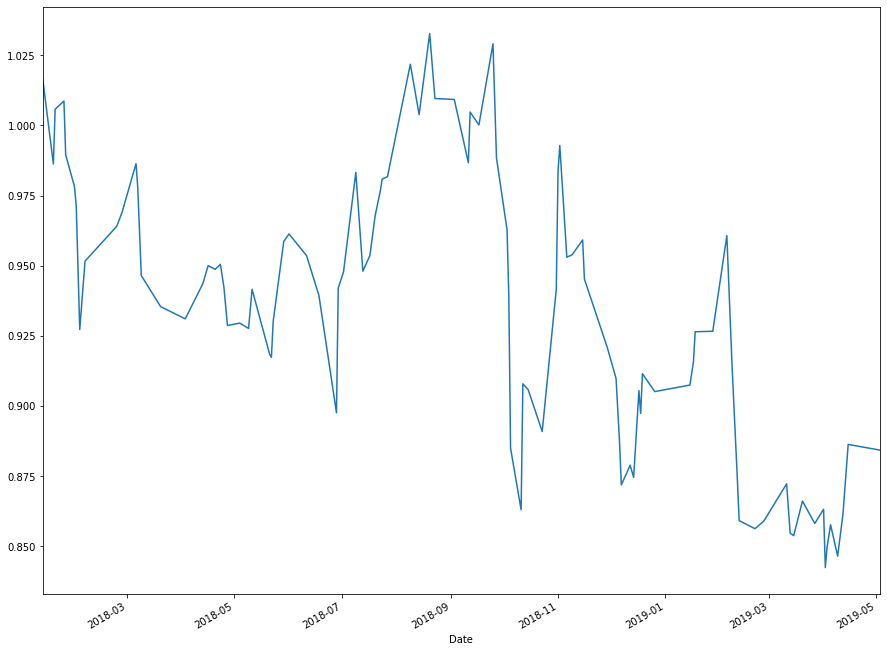

In [50]:
# plotting net cumulative returns
plt.figure(figsize = (15,12))
df3['Net Cumulative Return'].plot()